



















### Data Preparation:

In [ ]:
import pandas as pd

order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
category_translation= pd.read_csv("/content/product_category_name_translation.csv")

In [ ]:
order_reviews = order_reviews.drop(columns=['review_id', "review_comment_title"])
orders = orders.drop(columns=['order_delivered_carrier_date'])
order_payments = order_payments.drop(columns=['payment_sequential', 'payment_installments'])
products = products.drop(columns=['product_name_lenght',
       'product_description_lenght', 'product_photos_qty'])

df= pd.merge(customers, orders, on="customer_id", how='inner')
df= df.merge(order_reviews, on="order_id", how='inner')
df= df.merge(order_items, on="order_id", how='inner')
df= df.merge(products, on="product_id", how='inner')
df= df.merge(order_payments, on="order_id", how='inner')
df= df.merge(sellers, on='seller_id', how='inner')
df= df.merge(category_translation, on='product_category_name', how='inner')

df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_type,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,...,8683.0,54.0,64.0,31.0,credit_card,146.87,8577,itaquaquecetuba,SP,office_furniture
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-14 17:58:51,...,8267.0,52.0,52.0,17.0,credit_card,157.73,8577,itaquaquecetuba,SP,office_furniture
2,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-28 16:04:25,...,12160.0,56.0,51.0,28.0,credit_card,173.30,8577,itaquaquecetuba,SP,office_furniture
3,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-08-09 20:55:48,...,5200.0,45.0,15.0,35.0,credit_card,252.25,14940,ibitinga,SP,home_confort
4,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-28 17:32:43,...,4450.0,60.0,15.0,15.0,debit_card,282.21,5141,pirituba,SP,sports_leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104949,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-13 20:06:37,...,611.0,22.0,22.0,23.0,credit_card,88.78,17400,garca,SP,books_general_interest
104950,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-11 18:54:45,...,1211.0,25.0,24.0,22.0,credit_card,129.06,14802,araraquara,SP,sports_leisure
104951,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-05-09 19:03:15,...,870.0,25.0,20.0,18.0,credit_card,56.04,3304,sao paulo,SP,health_beauty
104952,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-16 19:58:39,...,710.0,19.0,13.0,14.0,credit_card,711.07,14840,guariba,SP,watches_gifts


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104954 entries, 0 to 104953
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    104954 non-null  object 
 1   customer_unique_id             104954 non-null  object 
 2   customer_zip_code_prefix       104954 non-null  int64  
 3   customer_city                  104954 non-null  object 
 4   customer_state                 104954 non-null  object 
 5   order_id                       104954 non-null  object 
 6   order_status                   104954 non-null  object 
 7   order_purchase_timestamp       104954 non-null  object 
 8   order_approved_at              104941 non-null  object 
 9   order_delivered_customer_date  102743 non-null  object 
 10  order_estimated_delivery_date  104954 non-null  object 
 11  review_score                   104954 non-null  int64  
 12  review_comment_message        

### EDA:

In [ ]:
#number of unique customers
customer_count = df['customer_unique_id'].nunique()

#number of unique sellers
seller_count = df['seller_id'].nunique()

#number of unique orders
order_count = df['order_id'].nunique()

print(f"Number of customers: {customer_count}")
print(f"Number of sellers: {seller_count}")
print(f"Number of orders: {order_count}")

In [ ]:
import plotly.express as px

#average review score per state
avg_review_score = df.groupby('customer_state')['review_score'].mean().reset_index()
avg_review_score.rename(columns={'customer_state': 'State', 'review_score': 'Avg Review Score'}, inplace=True)
avg_review_score = avg_review_score[avg_review_score['State'] != ' ']

#number of order in each state
order_stats = df.groupby('customer_state')['order_id'].nunique().reset_index()
order_stats.rename(columns={'customer_state': 'State', 'order_id': 'Number of Orders'}, inplace=True)
order_stats = order_stats[order_stats['State'] != ' ']

#number of customer in each state
customer_stats = df.groupby('customer_state')['customer_unique_id'].nunique().reset_index()
customer_stats.rename(columns={'customer_state': 'State', 'customer_unique_id': 'Number of Customers'}, inplace=True)
customer_stats = customer_stats[customer_stats['State'] != ' ']

#number of seller in each state
seller_stats = df.groupby('customer_state')['seller_id'].nunique().reset_index()
seller_stats.rename(columns={'customer_state': 'State', 'seller_id': 'Number of Seller'}, inplace=True)
seller_stats = seller_stats[seller_stats['State'] != ' ']

#combine dataframes
combined_stats = pd.merge(order_stats, customer_stats, on='State', how='outer')
combined_stats = pd.merge(combined_stats, seller_stats, on='State', how='outer')
combined_stats = pd.merge(combined_stats, avg_review_score, on='State', how='outer')

#choropleth map
fig = px.choropleth(
    combined_stats,
    geojson="https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson",
    locations="State",
    featureidkey="properties.sigla",
    color="Avg Review Score",
    color_continuous_scale="Viridis",
    hover_data=["Number of Customers", "Number of Seller", "Number of Orders"], #Show customer data on hover
    title="Average Review Score per Brazilian State"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
#monthly orders
import matplotlib.pyplot as plt

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = df.groupby('order_month')['order_id'].count()

#line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index.astype(str), monthly_orders.values)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#order status for each unique order
order_status_counts = df.groupby('order_id')['order_status'].first().value_counts()

#bar chart
plt.figure(figsize=(10, 6))
bars = order_status_counts.plot(kind='bar')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Order Status Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
for bar in bars.patches :
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')
plt.show()

#pie chart
order_status_percentages = (order_status_counts / order_status_counts.sum()) * 100
plt.figure(figsize=(10, 6))
plt.pie(order_status_percentages, startangle=90)
plt.title('Order Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#detailed table
order_status_table = pd.DataFrame({'Order Status': order_status_percentages.index,
                                   'Percentage': order_status_percentages.values})

order_status_table

In [ ]:
payment_methods_by_order = df.groupby('order_id')['payment_type'].first()
payment_method_counts = payment_methods_by_order.value_counts()

#pie chart
plt.figure(figsize=(10, 6))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Methods')
plt.axis('equal')
plt.show()

#detailed table
payment_method_totals = df.groupby('payment_type')['payment_value'].sum()
payment_table = pd.DataFrame({'Payment Method': payment_method_totals.index,
                             'Total Payment Value': payment_method_totals.values})
payment_table = payment_table.sort_values(by='Total Payment Value', ascending=False)
payment_table

In [ ]:
#review score distribution bar chart
review_scores_by_order = df.groupby('order_id')['review_score'].first()
review_score_counts = review_scores_by_order.value_counts().sort_index(ascending=False)

#bar chart
plt.figure(figsize=(10, 6))
bars = review_score_counts.plot(kind='bar')
plt.xlabel('Review Score')
plt.ylabel('Number of Orders')
plt.title('Review Score Distribution')
plt.xticks(rotation=0)
plt.tight_layout()

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.show()

### Feature Engineering:

In [ ]:
unique_categories = df['product_category_name_english'].unique()
unique_categories

array(['office_furniture', 'home_confort', 'sports_leisure',
       'computers_accessories', 'furniture_decor', 'auto',
       'air_conditioning', 'telephony', 'health_beauty', 'garden_tools',
       'pet_shop', 'bed_bath_table', 'watches_gifts',
       'kitchen_dining_laundry_garden_furniture', 'perfumery', 'toys',
       'art', 'stationery', 'fashio_female_clothing', 'consoles_games',
       'housewares', 'food_drink', 'drinks', 'cool_stuff',
       'fashion_bags_accessories', 'baby', 'luggage_accessories',
       'electronics', 'home_appliances_2', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'books_general_interest',
       'home_appliances', 'costruction_tools_tools',
       'signaling_and_security', 'construction_tools_lights',
       'home_construction', 'musical_instruments',
       'construction_tools_construction', 'music', 'fashion_shoes',
       'industry_commerce_and_business', 'fashion_underwear_beach',
       'dvds_blu_ray', 'fixed_telephony', 'fur

In [ ]:
def classify(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'

    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'

    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'

    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'

    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'

    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'

    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'

    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'

    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df['product_category'] = df.product_category_name_english.apply(classify)
df.product_category.value_counts()

,count
product_category,
Electronics,27491
Furniture,25998
Entertainment,12544
Beauty & Health,12288
Home & Garden,11821
Fashion,9019
Books & Stationery,3174
Industry & Construction,1510
Food & Drinks,1109


In [ ]:
df['product_volume'] = df.product_length_cm * df.product_width_cm * df.product_height_cm
df.drop(['product_length_cm', 'product_width_cm', 'product_height_cm'], axis= 1, inplace= True)

In [ ]:
timestamp_columns = ['order_purchase_timestamp', 'order_approved_at','order_delivered_customer_date', 'review_creation_date', "review_creation_date", "shipping_limit_date" ]

for col in timestamp_columns:
    df[col] = pd.to_datetime(df[col])


<ipython-input-7-de7358231655>:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col])


In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%d/%m/%Y %H:%M', dayfirst=True)
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], format='mixed', dayfirst=True)

df = df[df['order_purchase_timestamp'] <= df['order_approved_at']]
df = df[df['order_purchase_timestamp'] <= df['order_delivered_customer_date']]
df = df[df['order_purchase_timestamp'] <= df['order_estimated_delivery_date']]

df['delivery_duration_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['estimated_delivery_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days
df['ontime_delivery'] = df['delivery_duration_days'] <= df['estimated_delivery_days']
df['order_delay'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.days
df['delivery_duration_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['estimated_delivery_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days
df['ontime_delivery'] = df['delivery_duration_days'] <= df['estimated_delivery_days']
df['order_delay'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.days

In [ ]:
df['text_review'] = df['review_comment_message'].apply(lambda x: 'yes' if pd.notna(x) and len(str(x).strip()) > 0 else 'no')
df['review_length'] = df['review_comment_message'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

In [ ]:
df['customer_total_orders'] = df.groupby('customer_id')['order_id'].transform('count')
df['order_delay'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.days

In [ ]:
def categorize_review_score(score):
    if score <= 3:
        return 'negative'
    else:
        return 'positive'

df['review'] = df['review_score'].apply(categorize_review_score)
df[['review_score', 'review']].head()


,review_score,review
0,4,positive
1,5,positive
2,5,positive
3,5,positive
4,5,positive


In [ ]:
columns_to_drop = ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'order_id', 'order_purchase_timestamp', 'order_approved_at',
                   'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score', 'review_comment_message', 'review_creation_date',
                   'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'product_category_name',
                    'seller_zip_code_prefix', 'product_category_name_english', 'customer_avg_review_score', "customer_city", "seller_city"]


columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=columns_to_drop)

In [ ]:
df.isna().sum()

,0
customer_state,0
order_status,0
price,0
freight_value,0
product_weight_g,1
payment_type,0
payment_value,0
seller_state,0
product_category,0
product_volume,1


In [ ]:
df = df.dropna()
df.isna().sum()

,0
customer_state,0
order_status,0
price,0
freight_value,0
product_weight_g,0
payment_type,0
payment_value,0
seller_state,0
product_category,0
product_volume,0


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 10406


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.to_csv("df_final.csv")

### Encoding:

In [ ]:
target = 'review'
X = df.drop(columns=[target])
X

,customer_state,order_status,price,freight_value,product_weight_g,payment_type,payment_value,seller_state,product_category,product_volume,delivery_duration_days,estimated_delivery_days,ontime_delivery,order_delay,text_review,review_length,customer_total_orders
0,SP,delivered,124.99,21.88,8683.0,credit_card,146.87,SP,Furniture,107136.0,8,19,True,0,no,0,1
1,SP,delivered,139.94,17.79,8267.0,credit_card,157.73,SP,Furniture,45968.0,26,24,False,1,no,0,1
2,SP,delivered,149.94,23.36,12160.0,credit_card,173.30,SP,Furniture,79968.0,14,27,True,0,no,0,1
3,SP,delivered,230.00,22.25,5200.0,credit_card,252.25,SP,Home & Garden,23625.0,11,16,True,0,yes,8,1
4,SC,delivered,259.90,22.31,4450.0,debit_card,282.21,SP,Entertainment,13500.0,13,19,True,0,yes,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104949,SP,delivered,74.90,13.88,611.0,credit_card,88.78,SP,Books & Stationery,11132.0,6,17,True,0,no,0,1
104950,SP,delivered,114.90,14.16,1211.0,credit_card,129.06,SP,Entertainment,13200.0,7,15,True,0,no,0,1
104951,CE,delivered,37.00,19.04,870.0,credit_card,56.04,SP,Beauty & Health,9000.0,30,23,False,0,yes,11,1
104952,RS,delivered,689.00,22.07,710.0,credit_card,711.07,SP,Electronics,3458.0,12,31,True,0,no,0,1


In [ ]:
y = df[target]
y

,review
0,positive
1,positive
2,positive
3,positive
4,positive
...,...
104949,positive
104950,positive
104951,negative
104952,positive


In [ ]:
review_class_values = df['review'].value_counts()
review_class_values

,count
review,
positive,71612
negative,20711


In [ ]:
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X_encoded

,price,freight_value,product_weight_g,payment_value,product_volume,delivery_duration_days,estimated_delivery_days,ontime_delivery,order_delay,review_length,...,seller_state_SP,product_category_Books & Stationery,product_category_Electronics,product_category_Entertainment,product_category_Fashion,product_category_Food & Drinks,product_category_Furniture,product_category_Home & Garden,product_category_Industry & Construction,text_review_yes
0,124.99,21.88,8683.0,146.87,107136.0,8,19,True,0,0,...,True,False,False,False,False,False,True,False,False,False
1,139.94,17.79,8267.0,157.73,45968.0,26,24,False,1,0,...,True,False,False,False,False,False,True,False,False,False
2,149.94,23.36,12160.0,173.30,79968.0,14,27,True,0,0,...,True,False,False,False,False,False,True,False,False,False
3,230.00,22.25,5200.0,252.25,23625.0,11,16,True,0,8,...,True,False,False,False,False,False,False,True,False,True
4,259.90,22.31,4450.0,282.21,13500.0,13,19,True,0,2,...,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104949,74.90,13.88,611.0,88.78,11132.0,6,17,True,0,0,...,True,True,False,False,False,False,False,False,False,False
104950,114.90,14.16,1211.0,129.06,13200.0,7,15,True,0,0,...,True,False,False,True,False,False,False,False,False,False
104951,37.00,19.04,870.0,56.04,9000.0,30,23,False,0,11,...,True,False,False,False,False,False,False,False,False,True
104952,689.00,22.07,710.0,711.07,3458.0,12,31,True,0,0,...,True,False,True,False,False,False,False,False,False,False


In [ ]:
y = df['review'].map({'positive': 1,  'negative': 0})
y

,review
0,1
1,1
2,1
3,1
4,1
...,...
104949,1
104950,1
104951,0
104952,1


In [ ]:
y.isna().sum()

0

### Scaling, Train-Test Split:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

### OverSampling for Class Imbalance:

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print(f"Original class distribution: {Counter(y)}")
oversample = SMOTE(sampling_strategy={0: 60000}, random_state=42)
X_over, y_over = oversample.fit_resample(X_scaled, y)
print(f"Class distribution after oversampling: {Counter(y_over)}")



Original class distribution: Counter({1: 71612, 0: 20711})
Class distribution after oversampling: Counter({1: 71612, 0: 60000})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")


Training features shape: (92128, 71)
Test features shape: (39484, 71)
Training target shape: (92128,)
Test target shape: (39484,)


In [ ]:
import numpy as np

print(np.isnan(X_over).sum())  # Total number of NaNs in the array
print(np.isnan(y_over).sum())

0
0


### Hyperparameter Tuning:

In [ ]:
!pip install catboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:

from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

results = {}

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_train_pred_gb = gb.predict(X_train)
y_test_pred_gb = gb.predict(X_test)

results['Gradient Boosting'] = {
    'train_accuracy': accuracy_score(y_train, y_train_pred_gb),
    'test_accuracy': accuracy_score(y_test, y_test_pred_gb),
    'train_report': classification_report(y_train, y_train_pred_gb),
    'test_report': classification_report(y_test, y_test_pred_gb)
}


# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train)
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

results['XGBoost'] = {
    'train_accuracy': accuracy_score(y_train, y_train_pred_xgb),
    'test_accuracy': accuracy_score(y_test, y_test_pred_xgb),
    'train_report': classification_report(y_train, y_train_pred_xgb),
    'test_report': classification_report(y_test, y_test_pred_xgb)
}


# LightGBM Classifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_train_pred_lgbm = lgbm.predict(X_train)
y_test_pred_lgbm = lgbm.predict(X_test)

results['LightGBM'] = {
    'train_accuracy': accuracy_score(y_train, y_train_pred_lgbm),
    'test_accuracy': accuracy_score(y_test, y_test_pred_lgbm),
    'train_report': classification_report(y_train, y_train_pred_lgbm),
    'test_report': classification_report(y_test, y_test_pred_lgbm)
}


# CatBoost Classifier
cat = CatBoostClassifier(verbose=False)
cat.fit(X_train, y_train)
y_train_pred_cat = cat.predict(X_train)
y_test_pred_cat = cat.predict(X_test)

results['CatBoost'] = {
    'train_accuracy': accuracy_score(y_train, y_train_pred_cat),
    'test_accuracy': accuracy_score(y_test, y_test_pred_cat),
    'train_report': classification_report(y_train, y_train_pred_cat),
    'test_report': classification_report(y_test, y_test_pred_cat)
}


# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

results['Random Forest'] = {
    'train_accuracy': accuracy_score(y_train, y_train_pred_rf),
    'test_accuracy': accuracy_score(y_test, y_test_pred_rf),
    'train_report': classification_report(y_train, y_train_pred_rf),
    'test_report': classification_report(y_test, y_test_pred_rf)
}


for model, metrics in results.items():
    print(f"Results for {model}:")
    print(f"Training Accuracy: {metrics['train_accuracy']}")
    print(f"Testing Accuracy: {metrics['test_accuracy']}")
    print("Training Classification Report:\n", metrics['train_report'])
    print("Testing Classification Report:\n", metrics['test_report'])
    print("-" * 50)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:54:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 50147, number of negative: 41981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5290
[LightGBM] [Info] Number of data points in the train set: 92128, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544319 -> initscore=0.177742
[LightGBM] [Info] Start training from score 0.177742
Results for Gradient Boosting:
Training Accuracy: 0.8135528829454671
Testing Accuracy: 0.8123543713909431
Training Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77     41981
           1       0.79      0.90      0.84     50147

    accuracy                           0.81     92128
   macro avg       0.82      0.80      0.81     92128
weighted avg       0.82      0.81

In [ ]:
data = {
    "Model": ["Gradient Boosting", "XGBoost", "LightGBM", "CatBoost", "Random Forest"],
    "Training Accuracy": [0.8136, 0.8866, 0.8761, 0.8977, 0.9997],
    "Testing Accuracy": [0.8124, 0.8727, 0.8730, 0.8847, 0.8679],
    "Training Precision": [0.82, 0.89, 0.88, 0.90, 1.00],
    "Testing Precision": [0.82, 0.88, 0.88, 0.89, 0.87],
    "Training Recall": [0.80, 0.88, 0.87, 0.89, 1.00],
    "Testing Recall": [0.80, 0.87, 0.87, 0.88, 0.86],
    "Training F1": [0.81, 0.89, 0.88, 0.90, 1.00],
    "Testing F1": [0.81, 0.87, 0.87, 0.89, 0.87],
}


df = pd.DataFrame(data)


df["Accuracy Overfitting"] = df["Training Accuracy"] - df["Testing Accuracy"]
df["Precision Overfitting"] = df["Training Precision"] - df["Testing Precision"]
df["Recall Overfitting"] = df["Training Recall"] - df["Testing Recall"]
df["F1 Overfitting"] = df["Training F1"] - df["Testing F1"]


df["Testing Score"] = df[["Testing Accuracy", "Testing Precision", "Testing Recall", "Testing F1"]].mean(axis=1)
df["Overfitting Score"] = df[["Accuracy Overfitting", "Precision Overfitting", "Recall Overfitting", "F1 Overfitting"]].mean(axis=1)
df["Final Score"] = df["Testing Score"] - df["Overfitting Score"]


best_model_index = df["Final Score"].idxmax()


def highlight_best_model(row):
    if row.name == best_model_index:
        return ["background-color: green"] * len(row)
    else:
        return [""] * len(row)


best_model = df.style.apply(highlight_best_model, axis=1)
best_model

,Model,Training Accuracy,Testing Accuracy,Training Precision,Testing Precision,Training Recall,Testing Recall,Training F1,Testing F1,Accuracy Overfitting,Precision Overfitting,Recall Overfitting,F1 Overfitting,Testing Score,Overfitting Score,Final Score
0,Gradient Boosting,0.813600,0.812400,0.820000,0.820000,0.800000,0.800000,0.810000,0.810000,0.001200,0.000000,0.000000,0.000000,0.810600,0.000300,0.810300
1,XGBoost,0.886600,0.872700,0.890000,0.880000,0.880000,0.870000,0.890000,0.870000,0.013900,0.010000,0.010000,0.020000,0.873175,0.013475,0.859700
2,LightGBM,0.876100,0.873000,0.880000,0.880000,0.870000,0.870000,0.880000,0.870000,0.003100,0.000000,0.000000,0.010000,0.873250,0.003275,0.869975
3,CatBoost,0.897700,0.884700,0.900000,0.890000,0.890000,0.880000,0.900000,0.890000,0.013000,0.010000,0.010000,0.010000,0.886175,0.010750,0.875425
4,Random Forest,0.999700,0.867900,1.000000,0.870000,1.000000,0.860000,1.000000,0.870000,0.131800,0.130000,0.140000,0.130000,0.866975,0.132950,0.734025


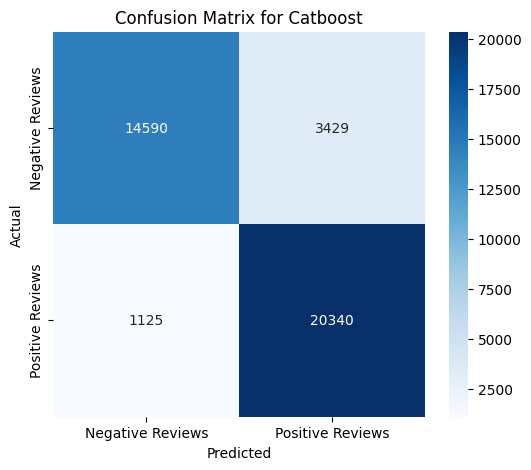

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_cat)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative Reviews', 'Positive Reviews'], yticklabels=['Negative Reviews', 'Positive Reviews'])
plt.title('Confusion Matrix for Catboost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


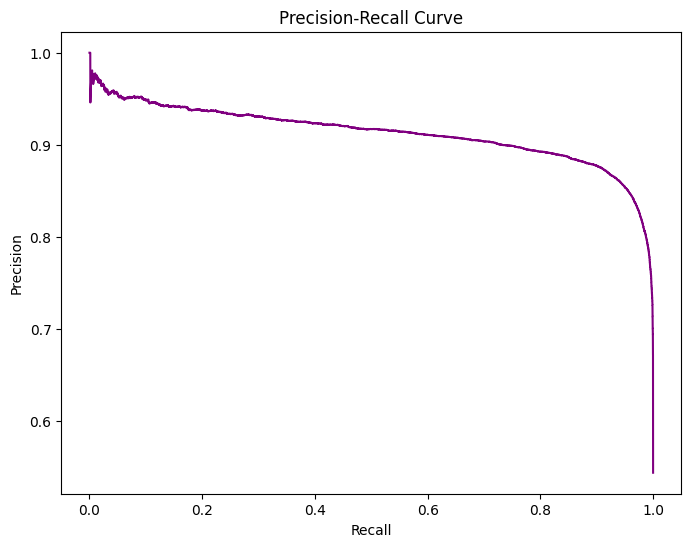

In [ ]:
from sklearn.metrics import precision_recall_curve


y_probs = cat.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()




---

# Model Comparison Summary

## Overview
This analysis evaluates five machine learning models (Gradient Boosting, XGBoost, LightGBM, CatBoost, and Random Forest) using the following metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- Overfitting (difference between training and testing performance)

The best model is determined based on:
1. High testing performance.
2. Minimal overfitting across all metrics.


---



### Observations

1. **CatBoost** achieved the highest testing performance with a **Final Score of 0.8728**, balancing high testing metrics and minimal overfitting.


2. **LightGBM** and **XGBoost** performed similarly, with slightly lower final scores due to marginally higher overfitting.


3. **Random Forest** showed extreme overfitting (large differences between training and testing metrics), leading to a low final score despite near-perfect training metrics.


4. **Gradient Boosting** had the lowest testing performance and final score, but it demonstrated minimal overfitting.

---



**CatBoost** is the best model, offering the most reliable balance between performance and generalization. It is recommended for deployment in this context.



---


### Stacking:

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_models = [
    ('gb', GradientBoostingClassifier()),
    ('xgb', XGBClassifier()),
    ('lgbm', LGBMClassifier()),
    ('cat', CatBoostClassifier())
]


meta_model = LogisticRegression()
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_clf.fit(X_train, y_train)



y_train_pred_stack = stacking_clf.predict(X_train)
y_test_pred_stack = stacking_clf.predict(X_test)



In [ ]:
print(classification_report(y_train, y_train_pred_stack))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     41981
           1       0.87      0.96      0.92     50147

    accuracy                           0.90     92128
   macro avg       0.91      0.90      0.90     92128
weighted avg       0.91      0.90      0.90     92128



In [ ]:
print(classification_report(y_test, y_test_pred_stack))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     18019
           1       0.86      0.94      0.90     21465

    accuracy                           0.89     39484
   macro avg       0.89      0.88      0.88     39484
weighted avg       0.89      0.89      0.89     39484



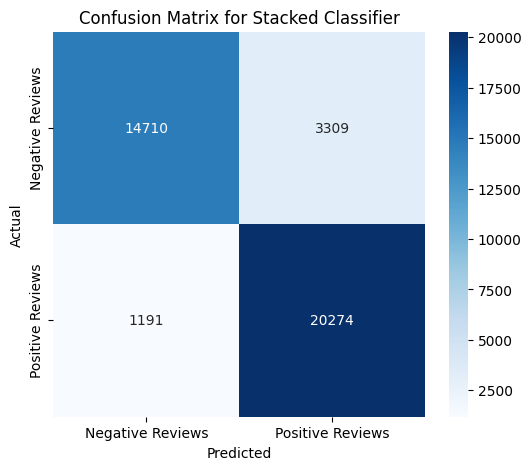

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_stack)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative Reviews', 'Positive Reviews'], yticklabels=['Negative Reviews', 'Positive Reviews'])
plt.title('Confusion Matrix for Stacked Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


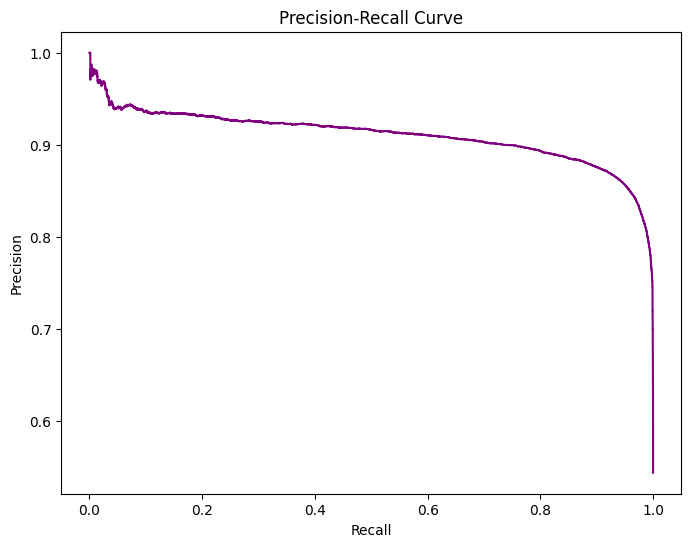

In [ ]:
from sklearn.metrics import precision_recall_curve


y_probs = stacking_clf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()




---

## **Model Comparison: CatBoost vs. Stacked Boosting Model**

### **1. Precision for Class 1:**
| **Model**            | **Class 1 Precision** |
|----------------------|-----------------------|
| **CatBoost**          | 0.86                  |
| **Stacked Boosting**  | 0.86                  |



- **Observation**: Both **CatBoost** and the **stacked boosting model** give us the same **precision for Class 1**, which is **0.86**. This indicates that both models are equally effective at minimizing false positives for Class 1.



### **2. Recall for Class 1:**
| **Model**            | **Class 1 Recall** |
|----------------------|--------------------|
| **CatBoost**          | 0.95               |
| **Stacked Boosting**  | 0.94               |

- **Observation**: **CatBoost** outperforms the stacked boosting model slightly in terms of **recall**, with **0.95** compared to **0.94**. This means that **CatBoost** is better at identifying true positives for Class 1, resulting in fewer false negatives.

### **3. F1-Score for Class 1:**
| **Model**            | **Class 1 F1-Score** |
|----------------------|----------------------|
| **CatBoost**          | 0.90                 |
| **Stacked Boosting**  | 0.90                 |

- **Observation**: Both models have the same **F1-Score for Class 1**, which is **0.90**. This suggests that they both strike a good balance between precision and recall, with no significant difference in their overall performance for Class 1 predictions.

### **4. Accuracy:**
| **Model**            | **Accuracy (Test)** |
|----------------------|---------------------|
| **CatBoost**          | 0.88                |
| **Stacked Boosting**  | 0.89                |

- **Observation**: The **stacked boosting model** achieves a slightly higher **accuracy (0.89)** compared to **CatBoost (0.88)**, but this difference is minor and less significant given that our primary focus is on Class 1 performance.

---

## **Final Decision: Which Model Should We Choose?**

### **Precision:**
- Both models show the same **precision for Class 1 (0.86)**, so there is no difference in minimizing false positives.

### **Recall:**
- **CatBoost** has a slight advantage in **recall (0.95)**, meaning it is better at identifying positive instances of Class 1. This is particularly useful if we want to minimize false negatives.

### **F1-Score:**
- Both models are equally strong in terms of **F1-Score (0.90)**, meaning they provide a good balance between precision and recall for Class 1.

### **Accuracy:**
- The **stacked boosting model** has a very marginally higher **accuracy (0.89 vs. 0.88)**, but since **Class 1** predictions are more important to us, this small difference in overall accuracy is not a deciding factor.





---

## **Recommendation:**

- If our goal is to **minimize false negatives** and prioritize **recall** for **Class 1**, **CatBoost** would be the better choice due to its **slightly higher recall (0.95)**.
- However, if we want a **slightly higher overall accuracy** and still maintain strong performance for **Class 1**, the **stacked boosting model** would be a good alternative, as it achieves a higher **accuracy (0.89)** while performing similarly to **CatBoost** in terms of **precision**, **recall**, and **F1-Score**.

### **Final Suggestion**:
- Based on our observations, we would proceed with **CatBoost** if maximizing **recall for Class 1** is the most important aspect of our model. However, the **stacked boosting model** remains a solid contender, especially if we value a slightly higher overall accuracy.

---



### Hyperparameter Tuning for CatBoost:

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


cat = CatBoostClassifier()

param_dist = {
    'learning_rate': np.arange(0.01, 0.3, 0.01),  # Range of learning rates to try
    'depth': [4, 6, 8, 10, 12],  # Range of depths to try
    'iterations': [500, 1000, 1500, 2000],  # Number of boosting iterations
    'l2_leaf_reg': [1, 3, 5, 7],  # L2 regularization parameters
    'border_count': [32, 64, 128, 256]  # Number of splits for numerical features
}

random_search = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    scoring='precision',  # Performance metric to optimize (you can change it to 'f1', 'precision', etc.)
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,  # Set random seed for reproducibility
    verbose=1  # Show progress
)

random_search.fit(X_train, y_train)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")


Best Parameters: {'learning_rate': 0.19, 'l2_leaf_reg': 1, 'iterations': 1500, 'depth': 12, 'border_count': 64}
Best Score: 0.8621790151203939

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score


best_catboost = CatBoostClassifier(
    learning_rate=0.19,
    l2_leaf_reg=1,
    iterations=1500,
    depth=12,
    border_count=64,
    verbose=0  # Suppress training output
)

best_catboost.fit(X_train, y_train)
y_train_pred = best_catboost.predict(X_train)
y_test_pred = best_catboost.predict(X_test)

# Evaluate performance on the training set
print("Training Set Evaluation:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report on Training Set:\n")
print(classification_report(y_train, y_train_pred))

# Evaluate performance on the testing set
print("Testing Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report on Testing Set:\n")
print(classification_report(y_test, y_test_pred))


Training Set Evaluation:
Accuracy: 0.9997069294894061

Classification Report on Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41981
           1       1.00      1.00      1.00     50147

    accuracy                           1.00     92128
   macro avg       1.00      1.00      1.00     92128
weighted avg       1.00      1.00      1.00     92128

Testing Set Evaluation:
Accuracy: 0.8856498834971127

Classification Report on Testing Set:

              precision    recall  f1-score   support

           0       0.91      0.83      0.87     18019
           1       0.87      0.93      0.90     21465

    accuracy                           0.89     39484
   macro avg       0.89      0.88      0.88     39484
weighted avg       0.89      0.89      0.89     39484



### Deployment:

In [ ]:
import joblib
joblib.dump(cat, 'cat_model.pkl')


['cat_model.pkl']

In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import joblib
import pandas as pd

model = joblib.load('cat_model.pkl')
st.title("Nile eCommerce Review Prediction App")
st.write("Predict whether a customer will leave a positive review.")

# Numeric Input Fields
price = st.number_input("Price ($)", min_value=0.0, format="%.2f")
freight_value = st.number_input("Freight Value ($)", min_value=0.0, format="%.2f")
product_weight_g = st.number_input("Product Weight (grams)", min_value=0)
payment_value = st.number_input("Payment Value ($)", min_value=0.0, format="%.2f")
product_volume = st.number_input("Product Volume (cm³)", min_value=0)
delivery_duration_days = st.number_input("Delivery Duration (days)", min_value=0)
estimated_delivery_days = st.number_input("Estimated Delivery Days", min_value=0)
ontime_delivery = st.number_input("On-time Delivery (1 for yes, 0 for no)", min_value=0, max_value=1)
order_delay = st.number_input("Order Delay (days)", min_value=0)
review_length = st.number_input("Review Length (characters)", min_value=0)
customer_total_orders = st.number_input("Total Orders by Customer", min_value=0)

# Dropdowns for Categorical Data
customer_state = st.selectbox("Customer State", ['SP', 'SC', 'MG', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'PR', 'MA', 'MS', 'CE', 'RN', 'DF', 'PE', 'MT', 'AM', 'AL', 'RO', 'PB', 'TO', 'PI', 'AC', 'SE', 'RR', 'AP'])
order_status = st.selectbox("Order Status", ['delivered', 'canceled'])
payment_type = st.selectbox("Payment Type", ['credit_card', 'debit_card', 'voucher', 'boleto'])
seller_state = st.selectbox("Seller State", ['SP', 'PR', 'MG', 'ES', 'RS', 'DF', 'SC', 'PE', 'RJ', 'MA', 'BA', 'MT', 'GO', 'MS', 'RO', 'PB', 'CE', 'PA', 'RN', 'PI', 'SE', 'AM'])
product_category = st.selectbox("Product Category", ['Furniture', 'Home & Garden', 'Entertainment', 'Electronics', 'Beauty & Health', 'Books & Stationery', 'Fashion', 'Food & Drinks', 'Industry & Construction'])
text_review = st.selectbox("Is there a Review?", ['yes', 'no'])


input_data = pd.DataFrame({
    'customer_state': [customer_state],
    'order_status': [order_status],
    'price': [price],
    'freight_value': [freight_value],
    'product_weight_g': [product_weight_g],
    'payment_type': [payment_type],
    'payment_value': [payment_value],
    'seller_state': [seller_state],
    'product_category': [product_category],
    'product_volume': [product_volume],
    'delivery_duration_days': [delivery_duration_days],
    'estimated_delivery_days': [estimated_delivery_days],
    'ontime_delivery': [ontime_delivery],
    'order_delay': [order_delay],
    'review_length': [review_length],
    'customer_total_orders': [customer_total_orders],
    'text_review': [text_review]
})


input_data_encoded = pd.get_dummies(input_data, drop_first=True)
missing_cols = set(train_columns) - set(input_data_encoded.columns)
for col in missing_cols:
    input_data_encoded[col] = 0
input_data_encoded = input_data_encoded[train_columns]


if st.button("Predict Review"):
    prediction = model.predict(input_data_encoded)
    result = "Positive" if prediction[0] == 1 else "Negative"
    st.write(f"Predicted Review Sentiment: {result}")